In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#import seaborn as sns
#from statsmodels.tsa.stattools import acf, pacf
#from statsmodels.tsa.arima.model import ARIMA, SARIMAXSpecification

C:\Users\Harold_King\Anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (
C:\Users\Harold_King\AppData\Roaming\Python\Python39\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
weather_df = pd.read_csv('Weather Data.csv')
weather_df.head(30)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
5,1/1/2012 5:00,-1.4,-3.3,87,9,6.4,101.27,Fog
6,1/1/2012 6:00,-1.5,-3.1,89,7,6.4,101.29,Fog
7,1/1/2012 7:00,-1.4,-3.6,85,7,8.0,101.26,Fog
8,1/1/2012 8:00,-1.4,-3.6,85,9,8.0,101.23,Fog
9,1/1/2012 9:00,-1.3,-3.1,88,15,4.0,101.20,Fog


In [3]:
weather_df['Weather'].unique()

array(['Fog', 'Freezing Drizzle,Fog', 'Mostly Cloudy', 'Cloudy', 'Rain',
       'Rain Showers', 'Mainly Clear', 'Snow Showers', 'Snow', 'Clear',
       'Freezing Rain,Fog', 'Freezing Rain', 'Freezing Drizzle',
       'Rain,Snow', 'Moderate Snow', 'Freezing Drizzle,Snow',
       'Freezing Rain,Snow Grains', 'Snow,Blowing Snow', 'Freezing Fog',
       'Haze', 'Rain,Fog', 'Drizzle,Fog', 'Drizzle',
       'Freezing Drizzle,Haze', 'Freezing Rain,Haze', 'Snow,Haze',
       'Snow,Fog', 'Snow,Ice Pellets', 'Rain,Haze', 'Thunderstorms,Rain',
       'Thunderstorms,Rain Showers', 'Thunderstorms,Heavy Rain Showers',
       'Thunderstorms,Rain Showers,Fog', 'Thunderstorms',
       'Thunderstorms,Rain,Fog',
       'Thunderstorms,Moderate Rain Showers,Fog', 'Rain Showers,Fog',
       'Rain Showers,Snow Showers', 'Snow Pellets', 'Rain,Snow,Fog',
       'Moderate Rain,Fog', 'Freezing Rain,Ice Pellets,Fog',
       'Drizzle,Ice Pellets,Fog', 'Drizzle,Snow', 'Rain,Ice Pellets',
       'Drizzle,Snow,Fog', 

In [5]:
weather_df.index = pd.to_datetime(weather_df['date'])

In [6]:
weather_df.drop(['date'], axis=1, inplace = True)

In [7]:
weather_df[weather_df['NAME']== 'DOUALA, CM']

,STATION,NAME,DATE,PRCP,SNWD,TAVG,TMAX,TMIN
1423,CM000004910,"DOUALA, CM",2014-05-31,NaN,NaN,83,NaN,NaN
1424,CM000004910,"DOUALA, CM",2014-06-01,0.31,NaN,81,NaN,73.0
1425,CM000004910,"DOUALA, CM",2014-06-02,0.16,NaN,82,NaN,NaN
1426,CM000004910,"DOUALA, CM",2014-06-03,0.00,NaN,83,90.0,70.0
1427,CM000004910,"DOUALA, CM",2014-06-04,NaN,NaN,80,NaN,NaN
...,...,...,...,...,...,...,...,...
2850,CM000004910,"DOUALA, CM",2018-04-27,NaN,NaN,82,90.0,NaN
2851,CM000004910,"DOUALA, CM",2018-04-28,0.94,NaN,81,NaN,73.0
2852,CM000004910,"DOUALA, CM",2018-04-29,0.67,NaN,80,NaN,NaN
2853,CM000004910,"DOUALA, CM",2018-04-30,0.16,NaN,83,NaN,75.0


In [4]:
weather_df.select_dtypes(exclude=object).columns

Index(['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h',
       'Visibility_km', 'Press_kPa'],
      dtype='object')

In [ ]:
import numpy as np

# Votre tableau initial
weather_conditions = np.array(['Fog', 'Freezing Drizzle,Fog', 'Mostly Cloudy', 'Cloudy', 'Rain',
                               'Rain Showers', 'Mainly Clear', 'Snow Showers', 'Snow', 'Clear',
                               'Freezing Rain,Fog', 'Freezing Rain', 'Freezing Drizzle',
                               'Rain,Snow', 'Moderate Snow', 'Freezing Drizzle,Snow',
                               'Freezing Rain,Snow Grains', 'Snow,Blowing Snow', 'Freezing Fog',
                               'Haze', 'Rain,Fog', 'Drizzle,Fog', 'Drizzle',
                               'Freezing Drizzle,Haze', 'Freezing Rain,Haze', 'Snow,Haze',
                               'Snow,Fog', 'Snow,Ice Pellets', 'Rain,Haze', 'Thunderstorms,Rain',
                               'Thunderstorms,Rain Showers', 'Thunderstorms,Heavy Rain Showers',
                               'Thunderstorms,Rain Showers,Fog', 'Thunderstorms',
                               'Thunderstorms,Rain,Fog',
                               'Thunderstorms,Moderate Rain Showers,Fog', 'Rain Showers,Fog',
                               'Rain Showers,Snow Showers', 'Snow Pellets', 'Rain,Snow,Fog',
                               'Moderate Rain,Fog', 'Freezing Rain,Ice Pellets,Fog',
                               'Drizzle,Ice Pellets,Fog', 'Drizzle,Snow', 'Rain,Ice Pellets',
                               'Drizzle,Snow,Fog', 'Rain,Snow Grains', 'Rain,Snow,Ice Pellets',
                               'Snow Showers,Fog', 'Moderate Snow,Blowing Snow'], dtype=object)

# Dictionnaire de traduction
translations = {
    'Fog': 'Brouillard',
    'Freezing Drizzle': 'Bruine Verglaçante',
    'Mostly Cloudy': 'Principalement Nuageux',
    'Cloudy': 'Nuageux',
    'Rain': 'Pluie',
    'Rain Showers': 'Averses de Pluie',
    'Mainly Clear': 'Principalement Dégagé',
    'Snow Showers': 'Averses de Neige',
    'Snow': 'Neige',
    'Clear': 'Dégagé',
    'Freezing Rain': 'Pluie Verglaçante',
    'Rain,Snow': 'Pluie,Neige',
    'Moderate Snow': 'Neige Modérée',
    'Snow,Blowing Snow': 'Neige,Neige Soufflée',
    'Freezing Fog': 'Brouillard Verglaçant',
    'Haze': 'Brume',
    'Rain,Fog': 'Pluie,Brouillard',
    'Drizzle,Fog': 'Bruine,Brouillard',
    'Drizzle': 'Bruine',
    'Freezing Drizzle,Haze': 'Bruine Verglaçante,Brume',
    'Freezing Rain,Haze': 'Pluie Verglaçante,Brume',
    'Snow,Haze': 'Neige,Brume',
    'Snow,Fog': 'Neige,Brouillard',
    'Snow,Ice Pellets': 'Neige,Granules de Glace',
    'Rain,Haze': 'Pluie,Brume',
    'Thunderstorms,Rain': 'Orages,Pluie',
    'Thunderstorms,Rain Showers': 'Orages,Averses de Pluie',
    'Thunderstorms,Heavy Rain Showers': 'Orages,Fortes Averses de Pluie',
    'Thunderstorms,Rain Showers,Fog': 'Orages,Averses de Pluie,Brouillard',
    'Thunderstorms': 'Orages',
    'Thunderstorms,Rain,Fog': 'Orages,Pluie,Brouillard',
    'Thunderstorms,Moderate Rain Showers,Fog': 'Orages,Averses de Pluie Modérées,Brouillard',
    'Rain Showers,Fog': 'Averses de Pluie,Brouillard',
    'Rain Showers,Snow Showers': 'Averses de Pluie,Averses de Neige',
    'Snow Pellets': 'Granules de Neige',
    'Rain,Snow,Fog': 'Pluie,Neige,Brouillard',
    'Moderate Rain,Fog': 'Pluie Modérée,Brouillard',
    'Freezing Rain,Ice Pellets,Fog': 'Pluie Verglaçante,Granules de Glace,Brouillard',
    'Drizzle,Ice Pellets,Fog': 'Bruine,Granules de Glace,Brouillard',
    'Drizzle,Snow': 'Bruine,Neige',
    'Rain,Ice Pellets': 'Pluie,Granules de Glace',
    'Drizzle,Snow,Fog': 'Bruine,Neige,Brouillard',
    'Rain,Snow Grains': 'Pluie,Grains de Neige',
    'Rain,Snow,Ice Pellets': 'Pluie,Neige,Granules de Glace',
    'Snow Showers,Fog': 'Averses de Neige,Brouillard',
    'Moderate Snow,Blowing Snow': 'Neige Modérée,Neige Soufflée'
}

# Traduction des conditions météorologiques
translated_conditions = np.array([', '.join(translations.get(cond.strip(), cond) for cond in condition.split(',')) for condition in weather_conditions])

# Afficher le résultat
print(translated_conditions)


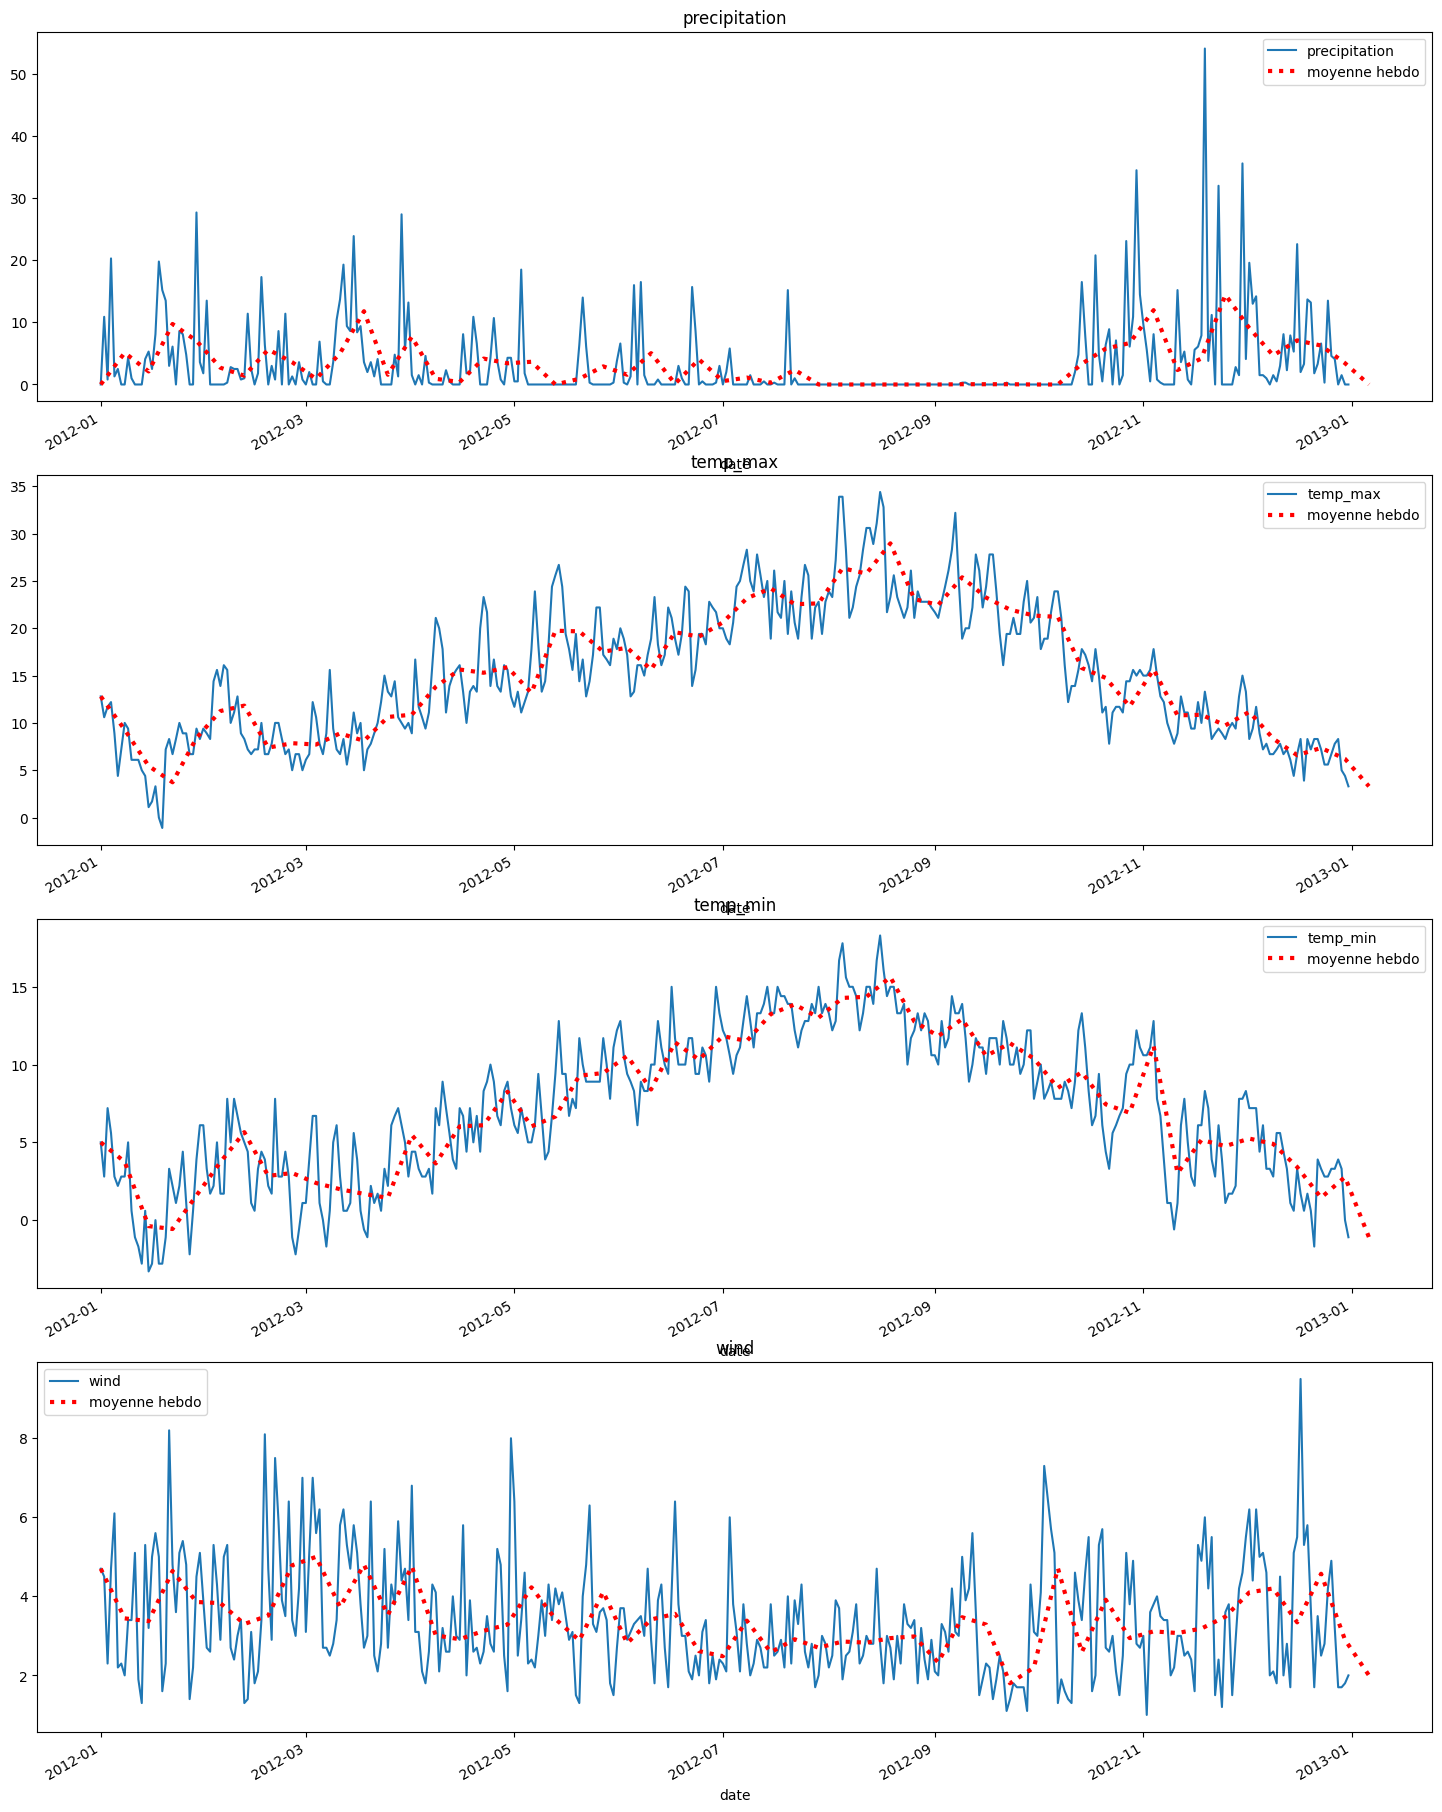

In [9]:
plt.figure(figsize=(18, 25))
i = 1
for col in columns:
    plt.subplot(len(columns),1, i)
    plt.plot(weather_df[col]['2012'], label= col)
    weather_df.loc['2012', col].resample('W').mean().plot(label ='moyenne hebdo',ls=':',lw=3, color = 'red')
    plt.title(col)
    plt.legend()
    plt.show
    i+=1
    

In [10]:
model_arima = ARIMA(weather_df.loc['2012':'2014','temp_max'], order=(2,0,2))
result_ARIMA = model_arima.fit()

C:\Users\Harold_King\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Harold_King\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Harold_King\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Harold_King\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Harold_King\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-i

In [18]:
training_set = weather_df.iloc[:,2:3].values
training_set

array([[ 5. ],
       [ 2.8],
       [ 7.2],
       ...,
       [ 0.6],
       [-1. ],
       [-2.1]])

In [19]:
def df_to_XY(df,window_size=10):
    X_train=[]
    y_train=[]
    for i in range(10,len(training_set)):
        X_train.append(training_set[i-10:i,0])
        y_train.append(training_set[i,0])
    
    X_train, y_train = np.array(X_train), np.array(y_train)
    return X_train, y_train

In [20]:
WINDOW = 10
X,y = df_to_XY(weather_df,WINDOW)
print(len(X),len(y))
X_train = X[:800]
y_train = y[:800]
X_val = X[800:1000]
y_val = y[800:1000]
X_test = X[1000:]
x_test = y[1000:]

1451 1451


In [21]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_val = np.reshape(X_val,(X_val.shape[0],X_val.shape[1],1))
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [22]:
X_train.shape

(800, 10, 1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#x_train, x_test, y_train, y_test = train_test_split(weather_df['precipitation'], weather_df['weather'], test_size=0.2, random_state=7)

In [ ]:
#RNN

In [50]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [24]:
regressor = Sequential()

In [25]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Drop

regressor = Sequential()
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [26]:
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [27]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [84]:
history=regressor.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=100, batch_size=32)

Epoch 1/100
25/25 [==============================] - 0s 14ms/step - loss: 1.1205 - val_loss: 3.2457
Epoch 2/100
25/25 [==============================] - 0s 12ms/step - loss: 1.0491 - val_loss: 3.3934
Epoch 3/100
25/25 [==============================] - 0s 12ms/step - loss: 1.1078 - val_loss: 3.0061
Epoch 4/100
25/25 [==============================] - 0s 12ms/step - loss: 1.0471 - val_loss: 3.1689
Epoch 5/100
25/25 [==============================] - 0s 12ms/step - loss: 1.1241 - val_loss: 3.0081
Epoch 6/100
25/25 [==============================] - 0s 12ms/step - loss: 1.1402 - val_loss: 3.3675
Epoch 7/100
25/25 [==============================] - 0s 12ms/step - loss: 1.1785 - val_loss: 3.0084
Epoch 8/100
25/25 [==============================] - 0s 12ms/step - loss: 1.0527 - val_loss: 3.1927
Epoch 9/100
25/25 [==============================] - 0s 12ms/step - loss: 1.2121 - val_loss: 3.2832
Epoch 10/100
25/25 [==============================] - 0s 12ms/step - loss: 1.0510 - val_loss: 3.3942

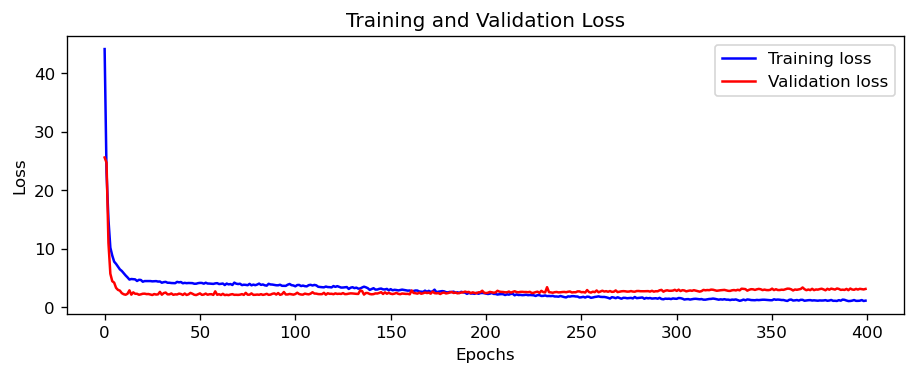

In [51]:
def visualize_loss(history, title):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(len(loss))
    plt.figure()
    plt.plot(epochs, loss, "b", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()


visualize_loss(history, "Training and Validation Loss")

In [29]:
train_pred = regressor.predict(X_train).flatten()
val_pred = regressor.predict(X_val).flatten()
test_pred = regressor.predict(X_test).flatten()

15/15 [==============================] - 0s 9ms/step


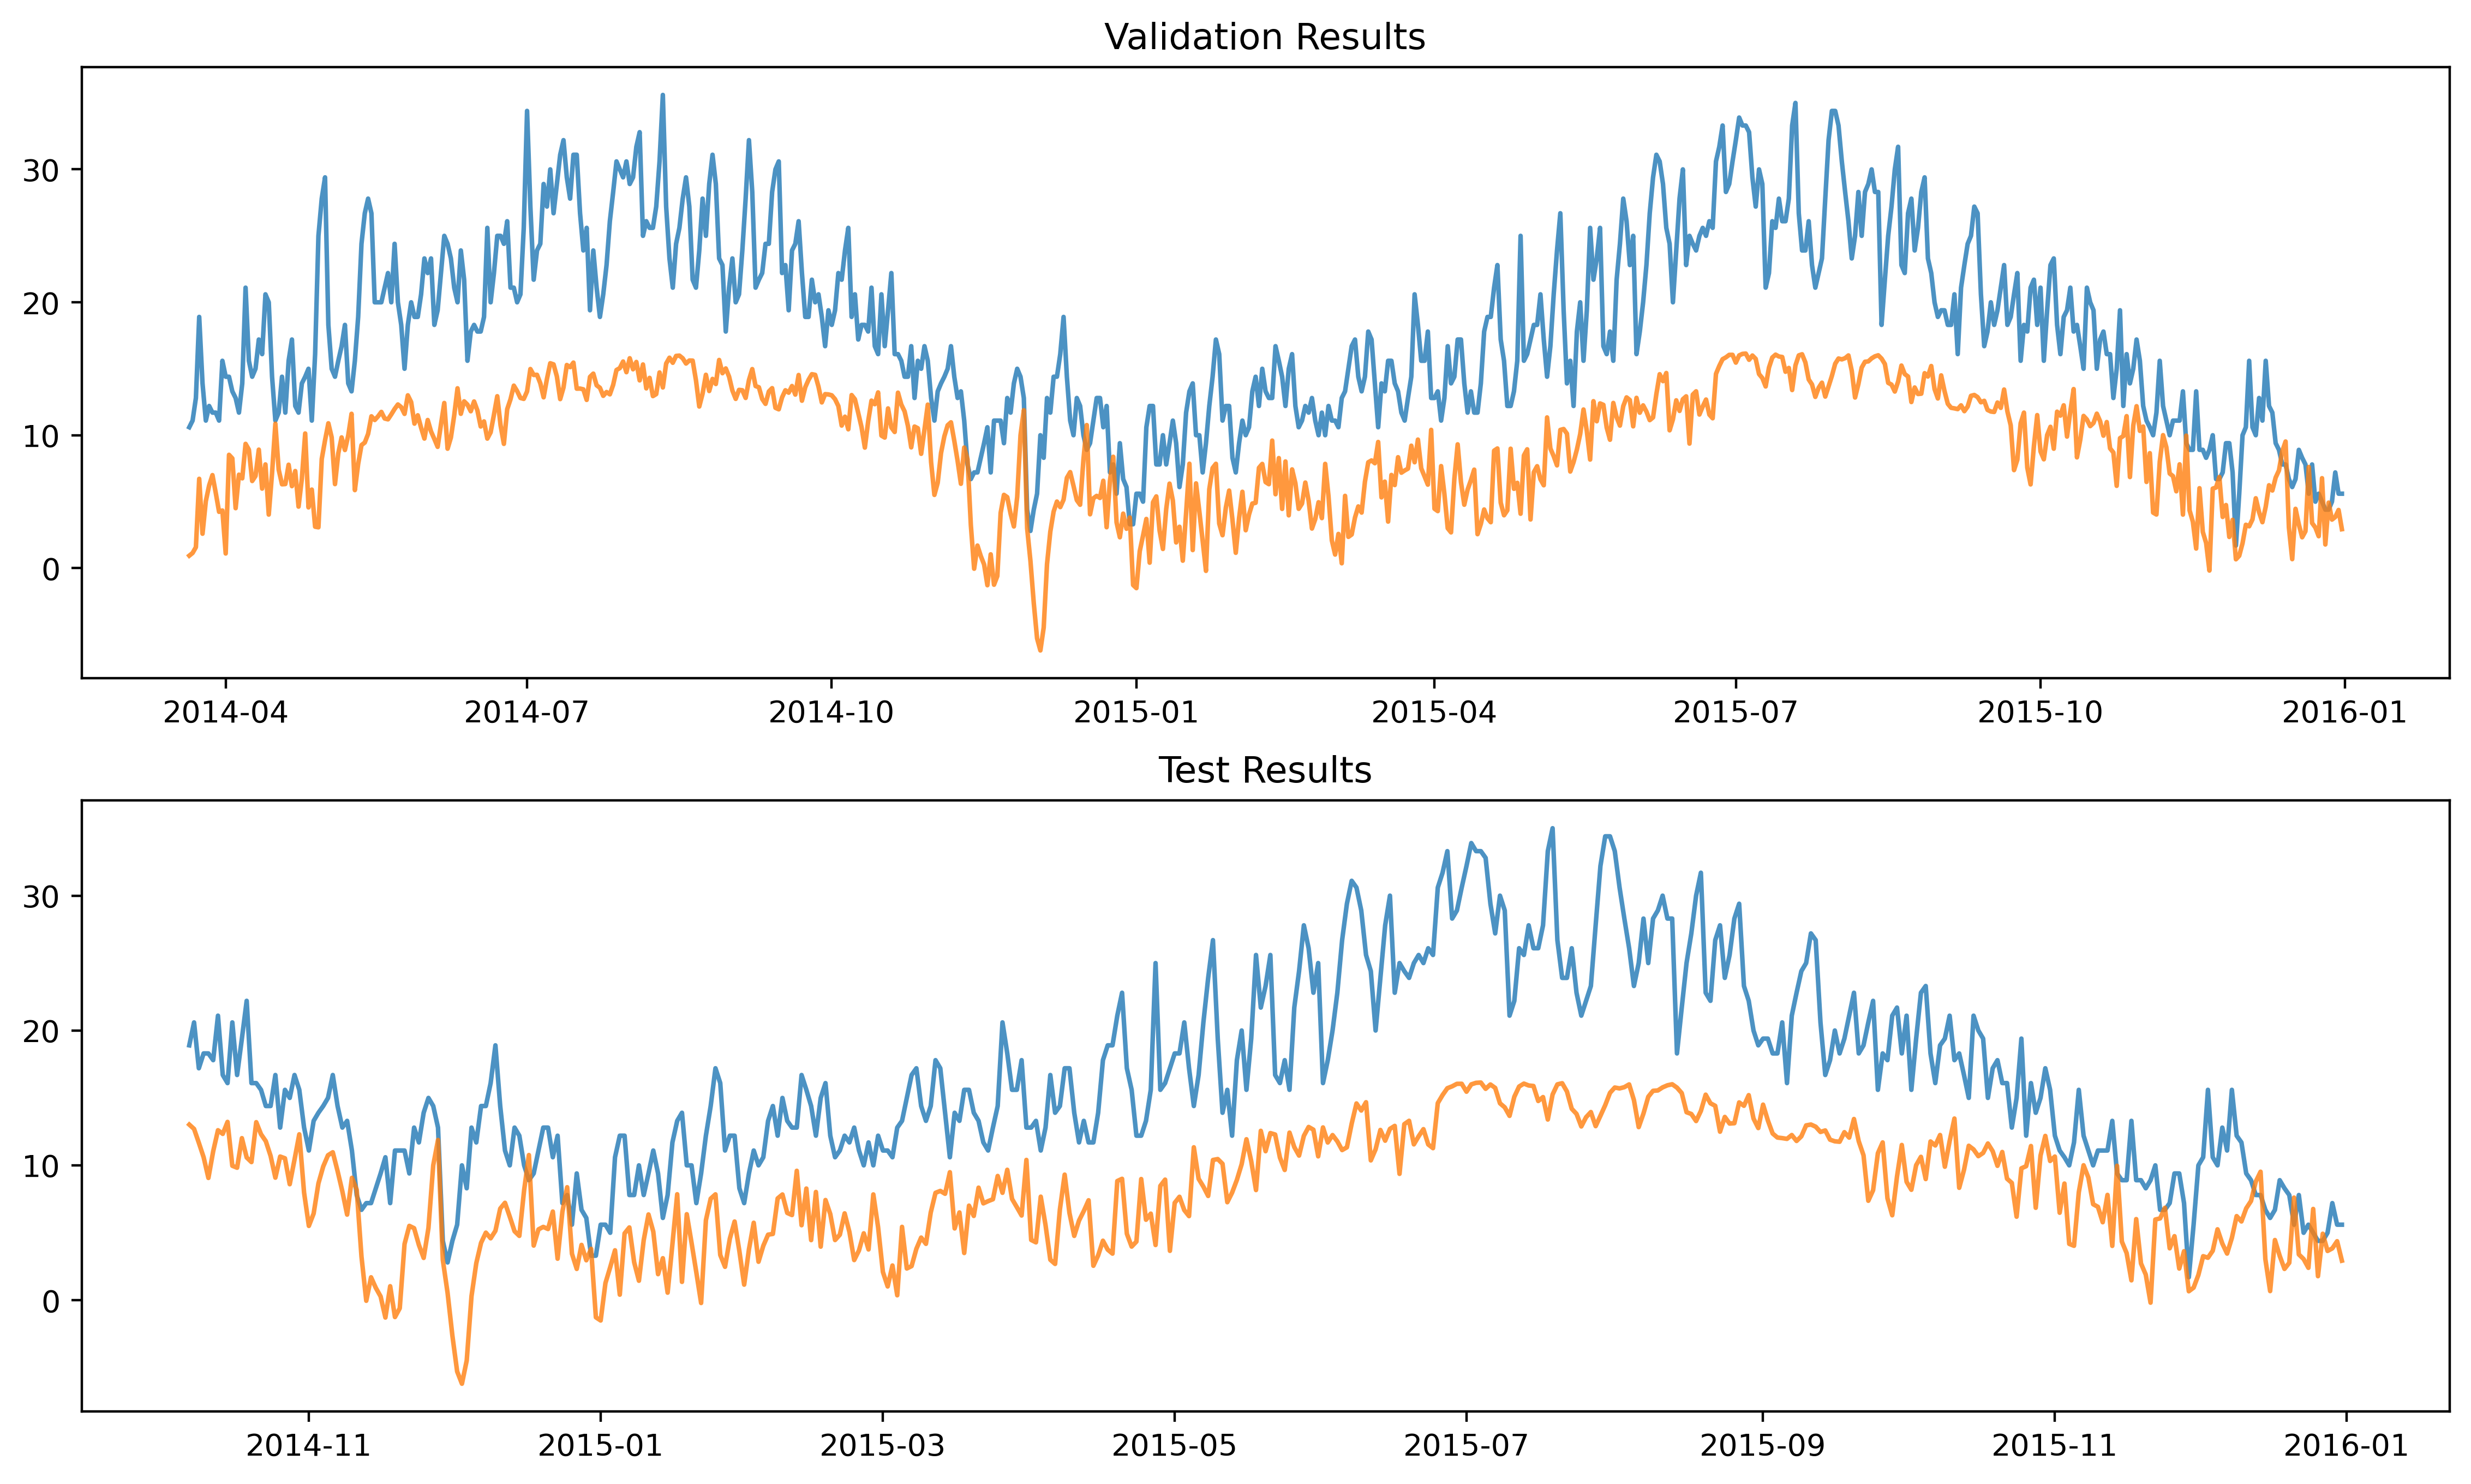